___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

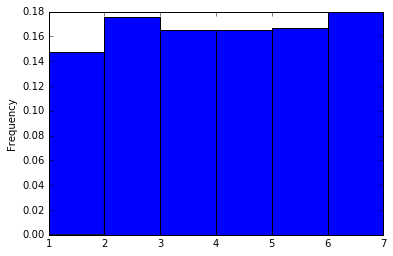

In [24]:
jogadas = []
for i in range (0,1000):
    n = np.random.randint(1,7)
    jogadas.append(n)

pd.Series(jogadas).plot.hist(bins=[1,2,3,4,5,6,7], normed=1)

A) As faces dos dados tem, teóricamente a mesma probabilidade.

B)A probabilidade experimental tende a probabilidade teórica, quanto maior a base experimental, menor a distancia entre a probabilidade experimental e a teórica.

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

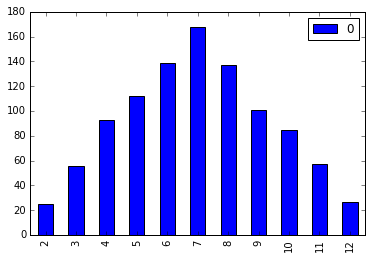

In [26]:
jogadas = []
for i in range (0,1000):
    n = np.random.randint(1,7)
    n2 = np.random.randint(1,7)
    soma = n+n2
    jogadas.append(soma)
    i+=1
    
#pd.Series(jogadas).plot.hist(bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], normed=1)

letter_counts = Counter(jogadas)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')


A probabilidade da soma dos números de dois de dados ser 7 é igual a 1/6, exatmante como pode ser visto no gráfico acima: dois dados foram lançados 1000 vezes e as vezes em que a soma deu 7 se aproxima de 166 (1/6 de 1000 )

A probabilidade de obter soma 7 já sabendo o resultado do primeiro pe de 1/6 pois são eventos independentes.
P(A|B) = P(A)

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [28]:
soma=0
for i in range (0,9999): 
    porta_premiada = np.random.randint(1,4)
    porta_escolhida = np.random.randint(1,4)
    porta_aberta = 1
    if porta_aberta==porta_premiada or porta_aberta==porta_escolhida:
        porta_aberta = 2
        if porta_aberta==porta_premiada or porta_aberta==porta_escolhida:
            porta_aberta=3
        
    if (porta_premiada==1 and porta_escolhida==1 and (porta_aberta==3 or porta_aberta==2))\
    or (porta_premiada==2 and porta_escolhida==2 and (porta_aberta==1 or porta_aberta==3))\
    or (porta_premiada==3 and porta_escolhida==3 and (porta_aberta==1 or porta_aberta==2)):
    
   
        soma+=1
10000-soma

print('Ganhar se mudar de porta')
print()
print('Probabilidade teórica:',2/3)
print('Probabilidade real:',(10000-soma)/10000)

Ganhar se mudar de porta

Probabilidade teórica: 0.6666666666666666
Probabilidade real: 0.6657
